# 1. Import Essential Libraries and Functions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# 2. Import Dataset 

In [3]:
df = pd.read_csv('Data/Global_Cybersecurity_Threats_2015-2024.csv')

## 2.1. Dataset Profiling

In [5]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [7]:
df.tail()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9
2999,Germany,2021,SQL Injection,Retail,48.20,480984,Unknown,Zero-day,VPN,64


In [9]:
print("Number of Records:", df.shape[0])
print("Number of Attributes:", df.shape[1])

Number of Records: 3000
Number of Attributes: 10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [13]:
df.describe(include = 'all')

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
count,3000,3000.000000,3000,3000,3000.000000,3000.000000,3000,3000,3000,3000.000000
unique,10,NaN,6,7,NaN,NaN,4,4,5,NaN
top,UK,NaN,DDoS,IT,NaN,NaN,Nation-state,Zero-day,Antivirus,NaN
freq,321,NaN,531,478,NaN,NaN,794,785,628,NaN
mean,NaN,2019.570333,NaN,NaN,50.492970,504684.136333,NaN,NaN,NaN,36.476000
std,NaN,2.857932,NaN,NaN,28.791415,289944.084972,NaN,NaN,NaN,20.570768
min,NaN,2015.000000,NaN,NaN,0.500000,424.000000,NaN,NaN,NaN,1.000000
25%,NaN,2017.000000,NaN,NaN,25.757500,255805.250000,NaN,NaN,NaN,19.000000
50%,NaN,2020.000000,NaN,NaN,50.795000,504513.000000,NaN,NaN,NaN,37.000000
75%,NaN,2022.000000,NaN,NaN,75.630000,758088.500000,NaN,NaN,NaN,55.000000


### 2.1.1. Converting Catagorical Objects into Numerical Catagories

In [15]:
df.nunique()

Country                                  10
Year                                     10
Attack Type                               6
Target Industry                           7
Financial Loss (in Million $)          2536
Number of Affected Users               2998
Attack Source                             4
Security Vulnerability Type               4
Defense Mechanism Used                    5
Incident Resolution Time (in Hours)      72
dtype: int64

In [17]:
cat_columns = df.select_dtypes(['object']).columns
cat_columns

Index(['Country', 'Attack Type', 'Target Industry', 'Attack Source',
       'Security Vulnerability Type', 'Defense Mechanism Used'],
      dtype='object')

In [19]:
df_cat = df[cat_columns].astype('category').apply(lambda x: x.cat.codes)
df_cat.head()

,Country,Attack Type,Target Industry,Attack Source,Security Vulnerability Type,Defense Mechanism Used
0,2,3,1,0,1,4
1,2,4,5,0,1,3
2,5,2,4,0,2,4
3,8,4,6,2,0,0
4,4,2,4,1,0,4


In [21]:
df_with_label = pd.merge(df[["Year", "Financial Loss (in Million $)", "Number of Affected Users", "Incident Resolution Time (in Hours)"]], df_cat, left_index=True, right_index=True)
df_with_label.head()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours),Country,Attack Type,Target Industry,Attack Source,Security Vulnerability Type,Defense Mechanism Used
0,2019,80.53,773169,63,2,3,1,0,1,4
1,2019,62.19,295961,71,2,4,5,0,1,3
2,2017,38.65,605895,20,5,2,4,0,2,4
3,2024,41.44,659320,7,8,4,6,2,0,0
4,2018,74.41,810682,68,4,2,4,1,0,4


### 2.1.2. Converting Objects to Dummies

In [23]:
df_dummy_cat = df[["Country", "Attack Type", "Target Industry", "Attack Source", "Security Vulnerability Type", "Defense Mechanism Used" ]]

df_dummy = pd.get_dummies(df_dummy_cat, dtype = 'int')
df_dummy.head()

,Country_Australia,Country_Brazil,Country_China,Country_France,Country_Germany,Country_India,Country_Japan,Country_Russia,Country_UK,Country_USA,...,Attack Source_Unknown,Security Vulnerability Type_Social Engineering,Security Vulnerability Type_Unpatched Software,Security Vulnerability Type_Weak Passwords,Security Vulnerability Type_Zero-day,Defense Mechanism Used_AI-based Detection,Defense Mechanism Used_Antivirus,Defense Mechanism Used_Encryption,Defense Mechanism Used_Firewall,Defense Mechanism Used_VPN
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [25]:
print("Number of Records:", df_dummy.shape[0])
print("Number of Attributes:", df_dummy.shape[1])

Number of Records: 3000
Number of Attributes: 36


In [27]:
df_with_dummy = pd.merge(df[["Year", "Financial Loss (in Million $)", "Number of Affected Users", "Incident Resolution Time (in Hours)"]], df_dummy, left_index=True, right_index=True)
df_with_dummy.head()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours),Country_Australia,Country_Brazil,Country_China,Country_France,Country_Germany,Country_India,...,Attack Source_Unknown,Security Vulnerability Type_Social Engineering,Security Vulnerability Type_Unpatched Software,Security Vulnerability Type_Weak Passwords,Security Vulnerability Type_Zero-day,Defense Mechanism Used_AI-based Detection,Defense Mechanism Used_Antivirus,Defense Mechanism Used_Encryption,Defense Mechanism Used_Firewall,Defense Mechanism Used_VPN
0,2019,80.53,773169,63,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2019,62.19,295961,71,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2017,38.65,605895,20,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,2024,41.44,659320,7,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2018,74.41,810682,68,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


# 3. Exploratory Data Analysis

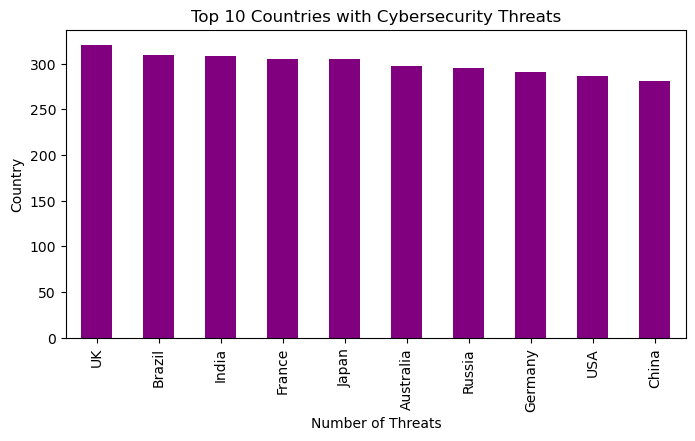

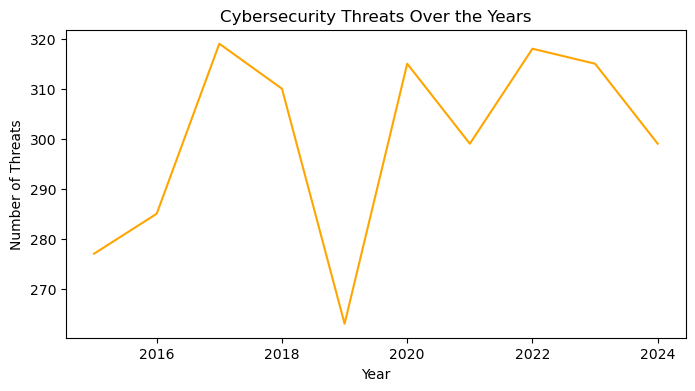

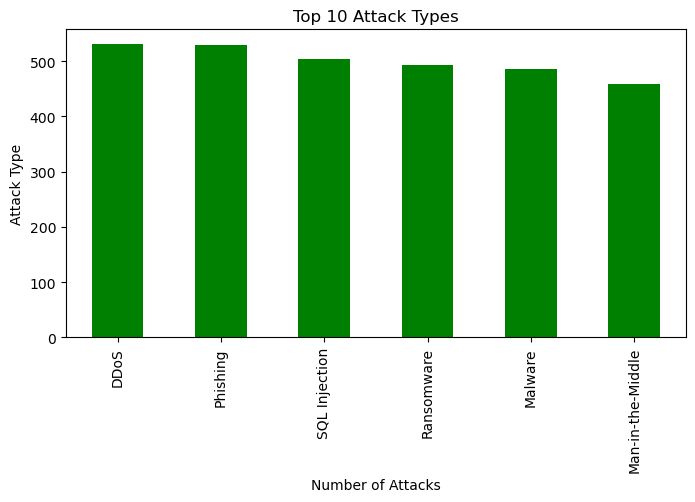

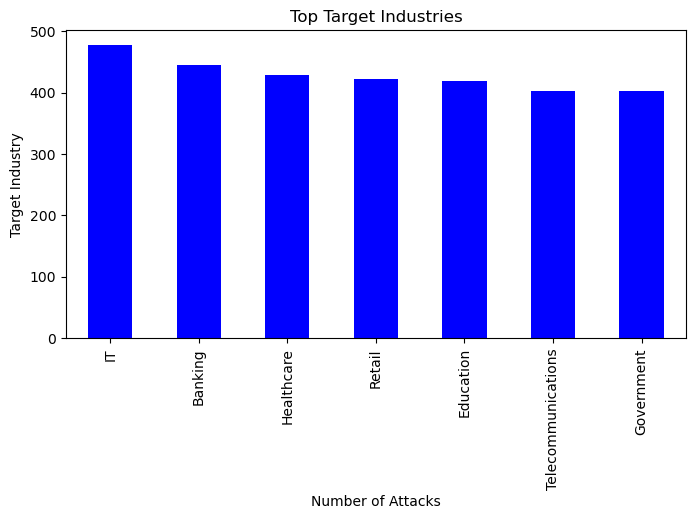

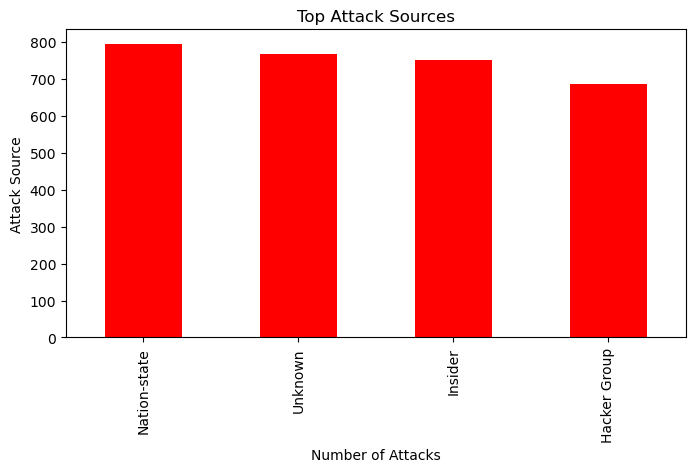

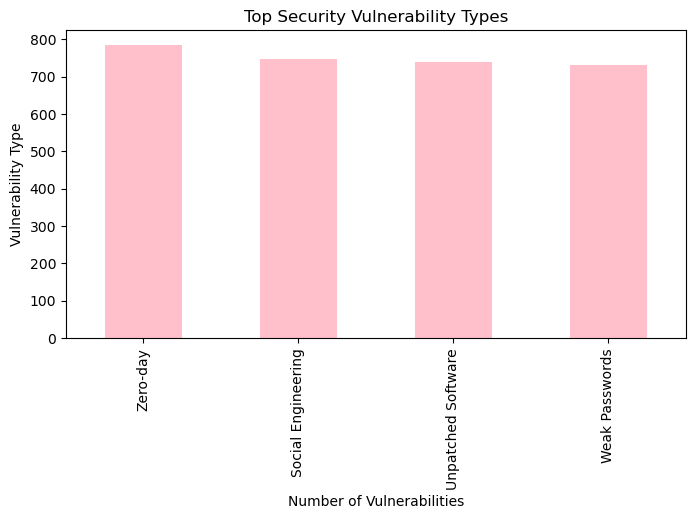

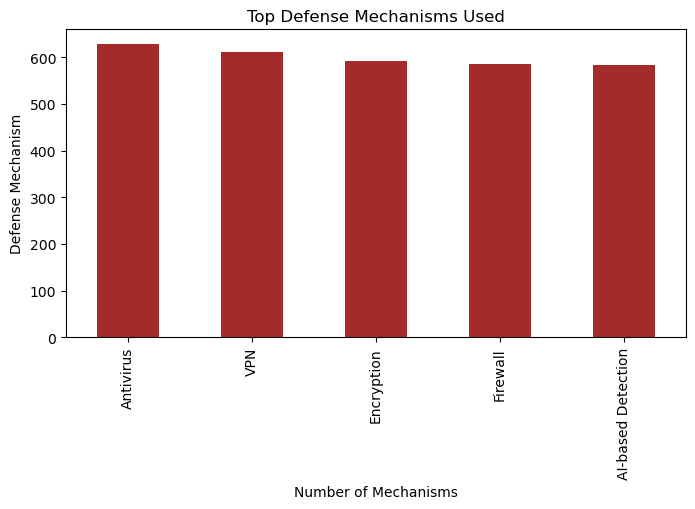

In [29]:
# First count of unique in  country values
df["Country"].value_counts().head(10).plot(kind = "bar", figsize = (8, 4), color = "purple")
plt.title("Top 10 Countries with Cybersecurity Threats")
plt.xlabel("Number of Threats")
plt.ylabel("Country")
plt.show()

# Count of Years
df["Year"].value_counts().sort_index().plot(kind="line", figsize=(8, 4), color="orange")
plt.title("Cybersecurity Threats Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Threats")
plt.show()

# Count of unique values in attack types
df["Attack Type"].value_counts().plot(kind = "bar", figsize = (8, 4), color = "green")
plt.title("Top 10 Attack Types")
plt.xlabel("Number of Attacks")
plt.ylabel("Attack Type")
plt.show()

# Count of unique values in target industry
df["Target Industry"].value_counts().head(10).plot(kind = "bar", figsize = (8, 4), color = "blue")
plt.title("Top Target Industries")
plt.xlabel("Number of Attacks")
plt.ylabel("Target Industry")
plt.show()

# Count of unique values in  attack source
df["Attack Source"].value_counts().plot(kind = "bar", figsize = (8, 4), color = "red")
plt.title("Top Attack Sources")
plt.xlabel("Number of Attacks")
plt.ylabel("Attack Source")
plt.show()

# Count of unique values in  Security Vulnerability Type
df["Security Vulnerability Type"].value_counts().head(10).plot(kind = "bar", figsize = (8, 4), color = "pink")
plt.title("Top Security Vulnerability Types")
plt.xlabel("Number of Vulnerabilities")
plt.ylabel("Vulnerability Type")
plt.show()

# Count of unique values in Defense Mechanism Used
df["Defense Mechanism Used"].value_counts().head(10).plot(kind = "bar", figsize = (8, 4), color = "brown")
plt.title("Top Defense Mechanisms Used")
plt.xlabel("Number of Mechanisms")
plt.ylabel("Defense Mechanism")
plt.show()

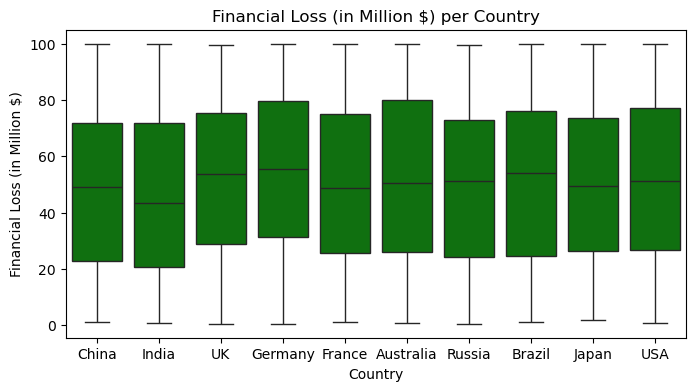

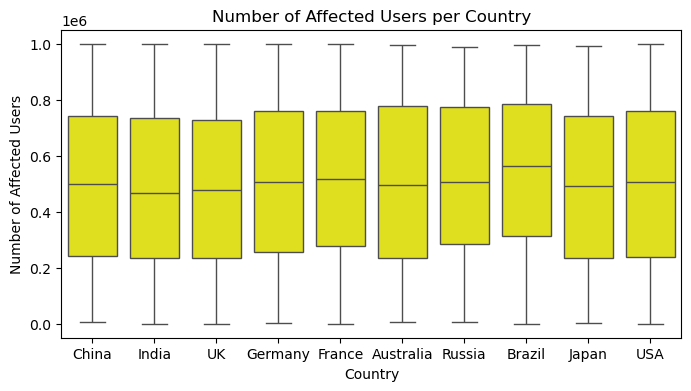

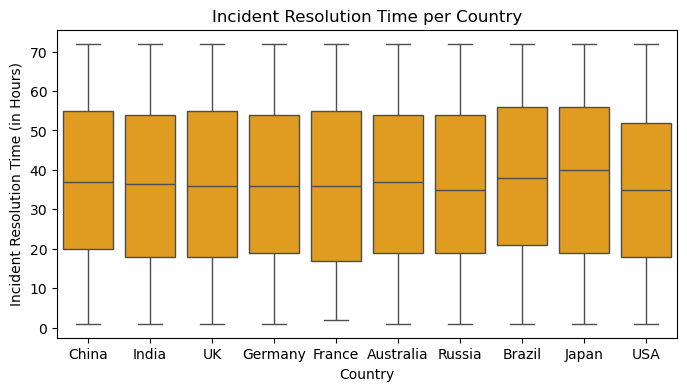

In [31]:
plt.figure(figsize=(8, 4))
sns.boxplot(data = df, x = "Country", y = "Financial Loss (in Million $)", color = "Green")
plt.title("Financial Loss (in Million $) per Country")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data = df, x = "Country", y = "Number of Affected Users", color = "Yellow")
plt.title("Number of Affected Users per Country")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data = df, x = "Country", y = "Incident Resolution Time (in Hours)", color = "Orange")
plt.title("Incident Resolution Time per Country")
plt.show()



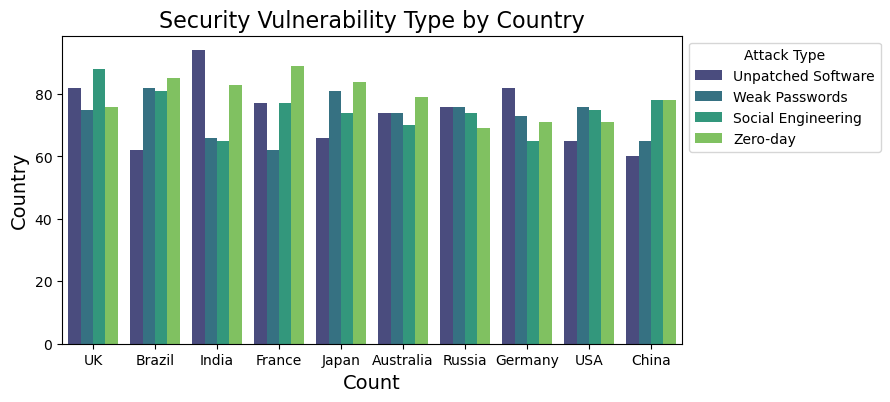

In [33]:
plt.figure(figsize=(8, 4))
sns.countplot(data = df, x = "Country", order = df["Country"].value_counts().index, hue = "Security Vulnerability Type", palette="viridis")
plt.title("Security Vulnerability Type by Country", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.legend(title="Attack Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

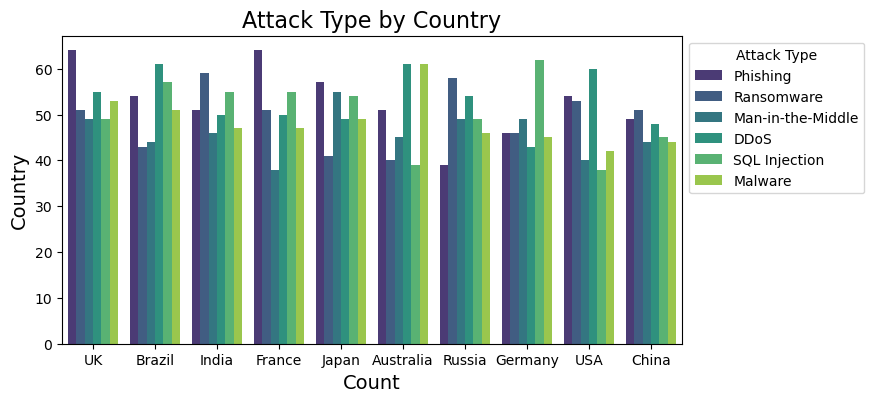

In [39]:
plt.figure(figsize=(8, 4))
sns.countplot(data = df, x = "Country", order = df["Country"].value_counts().index, hue = "Attack Type", palette="viridis")
plt.title("Attack Type by Country", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.legend(title="Attack Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

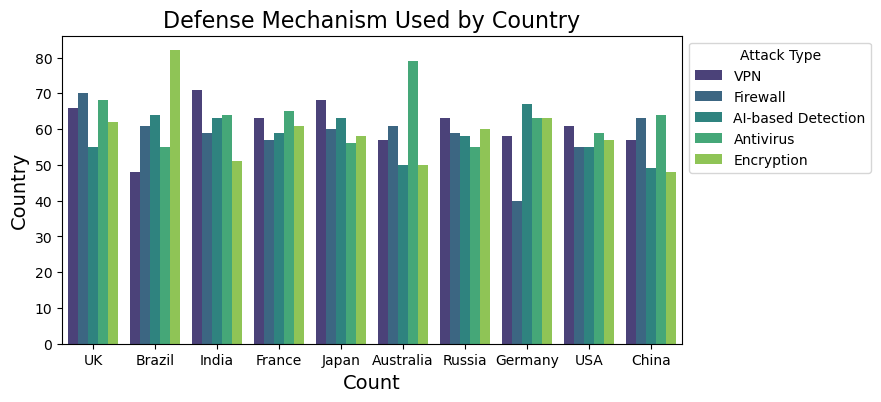

In [37]:
plt.figure(figsize=(8, 4))
sns.countplot(data = df, x = "Country", order = df["Country"].value_counts().index, hue = "Defense Mechanism Used",palette="viridis")
plt.title("Defense Mechanism Used by Country", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.legend(title="Attack Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

<Axes: >

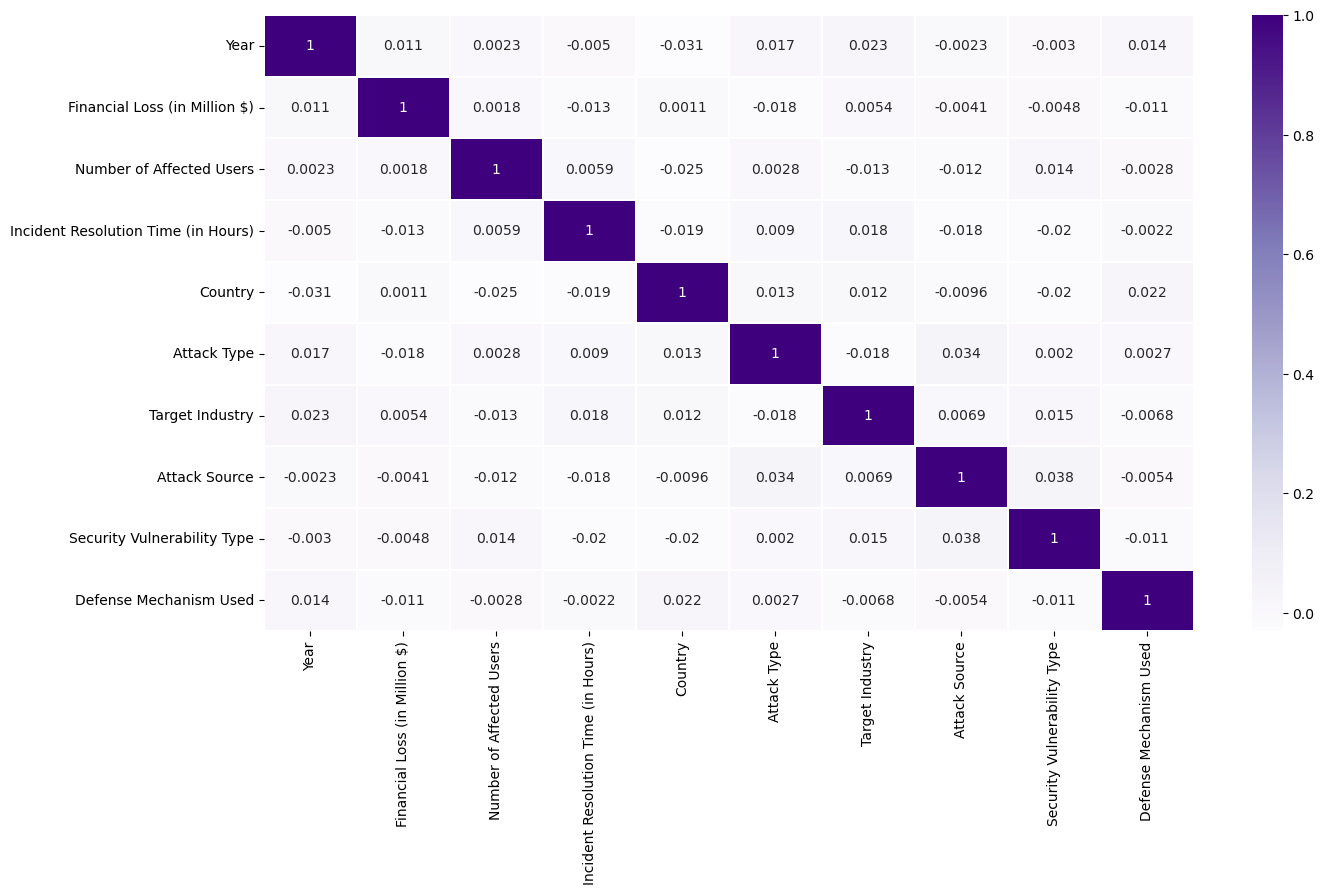

In [41]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_with_label.corr(), annot = True, cmap = 'Purples', linewidths = 0.2)

<Axes: >

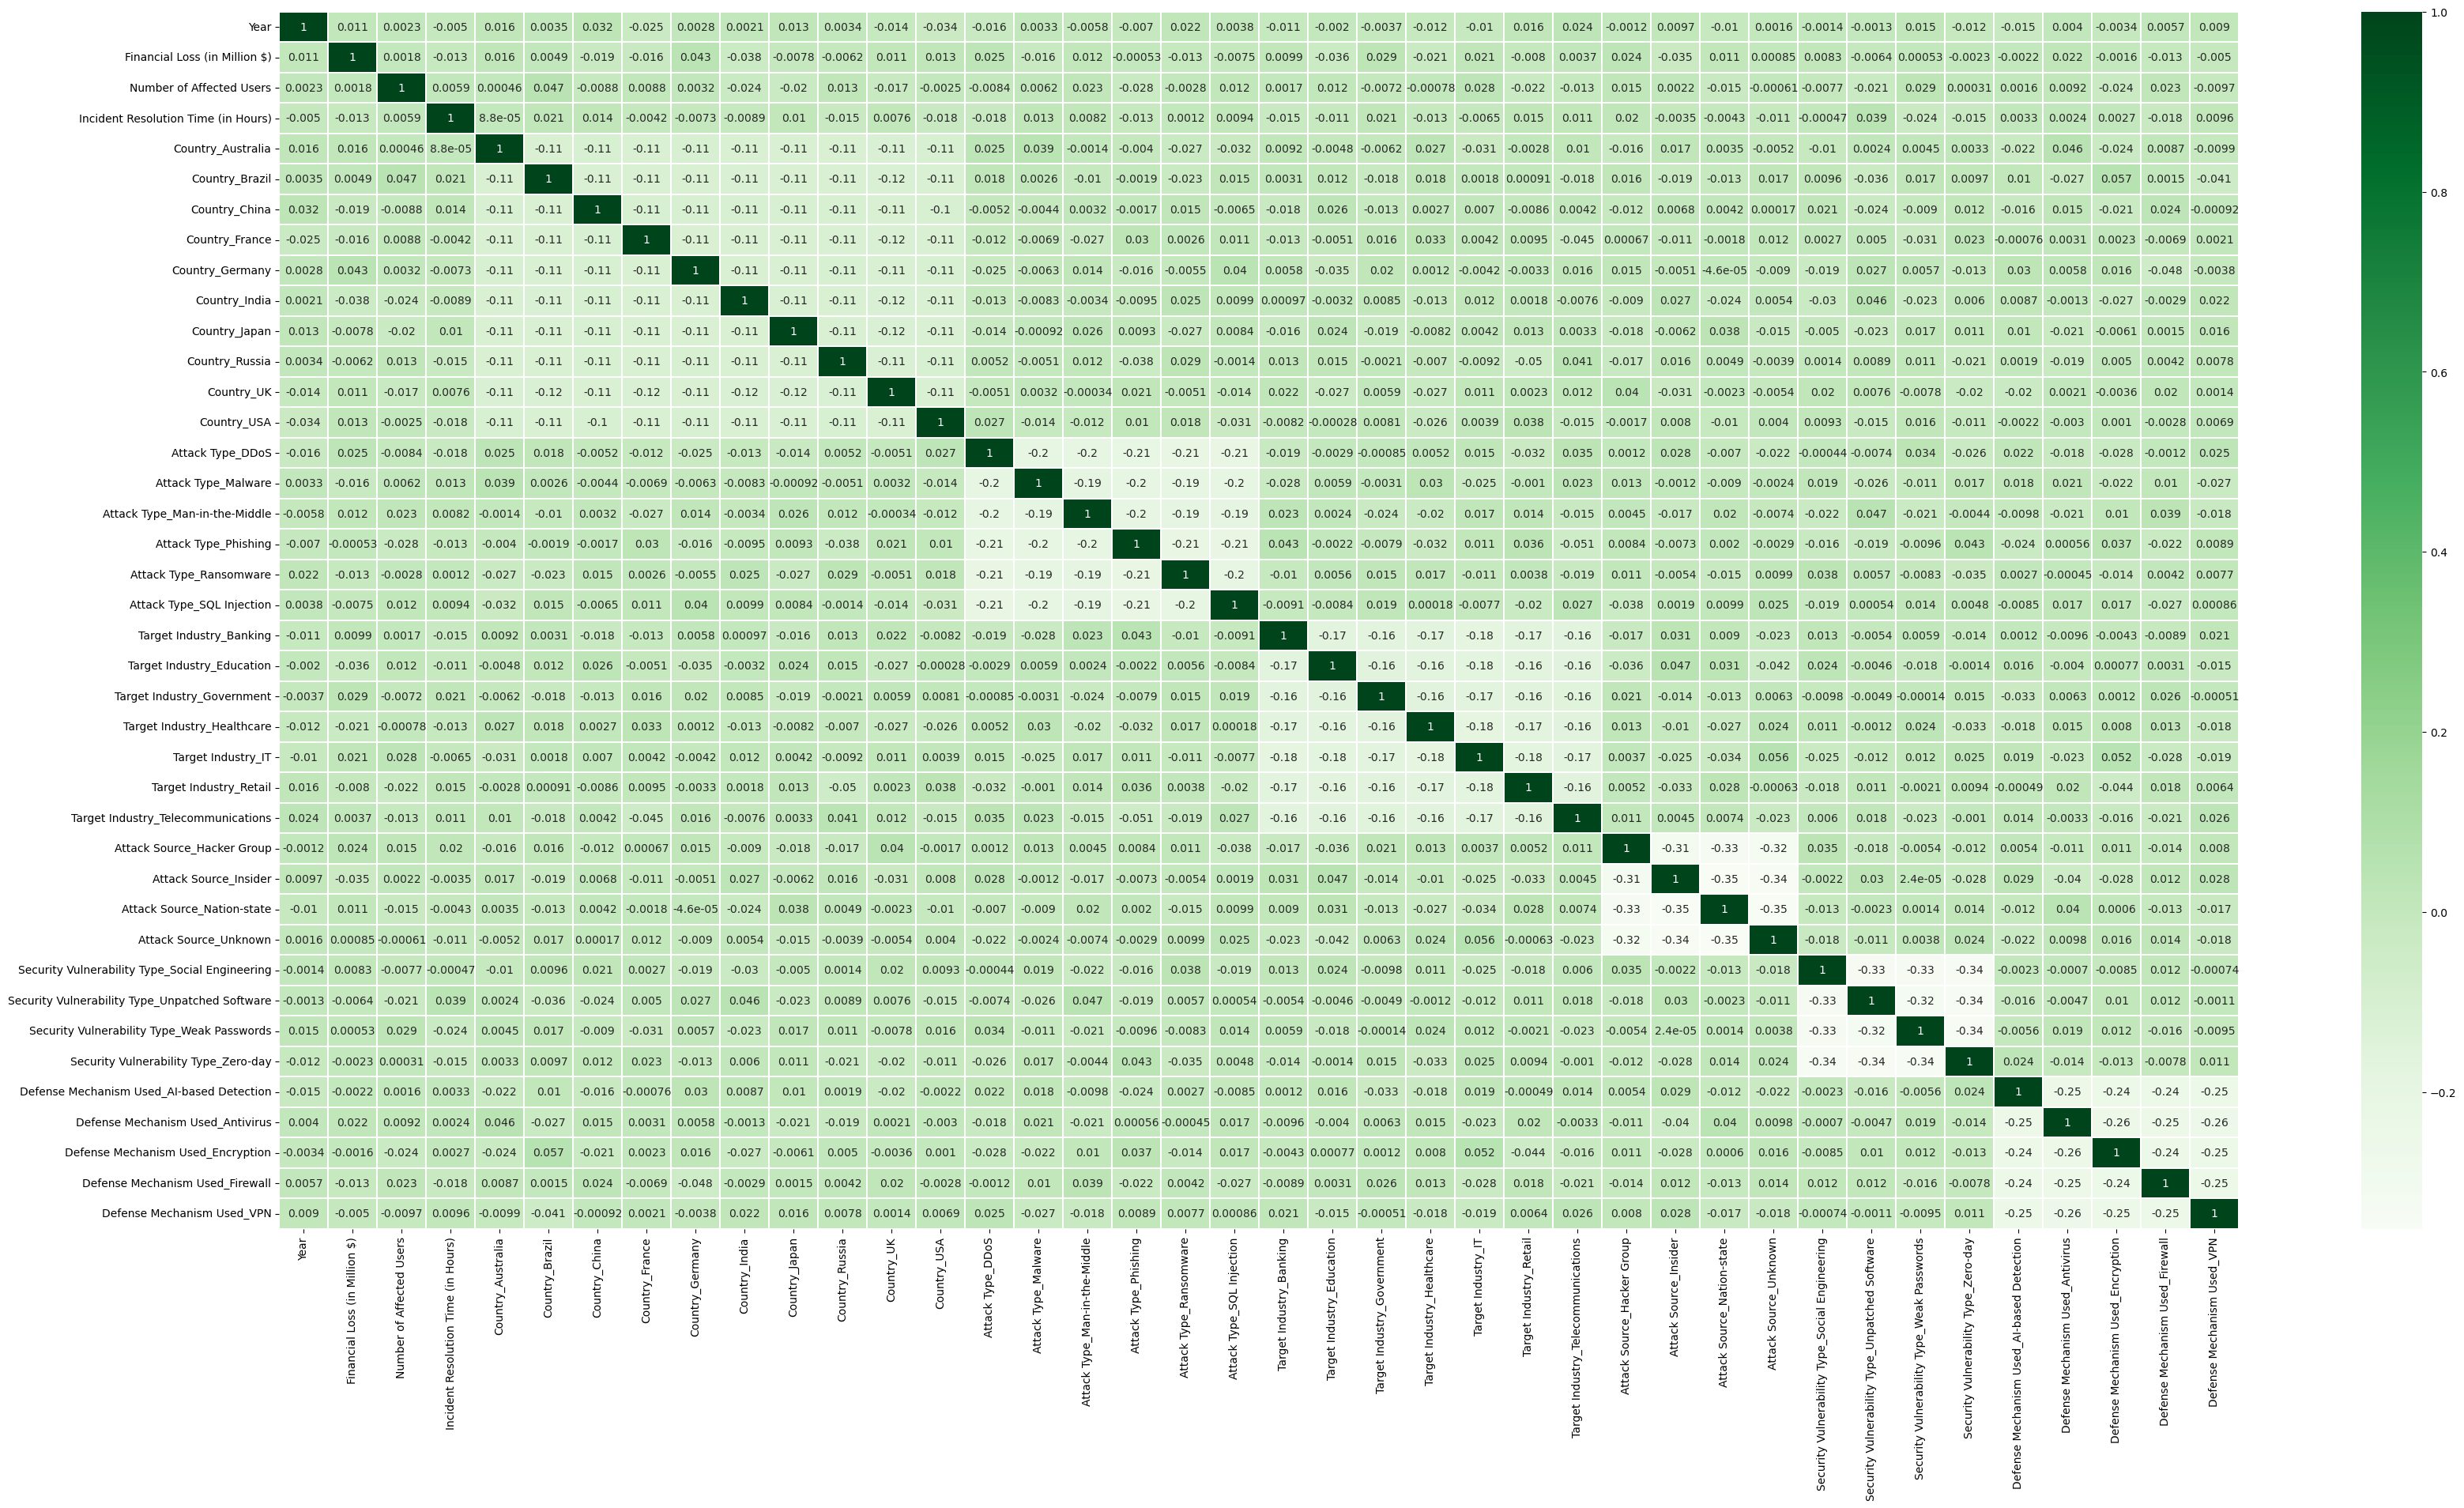

In [43]:
plt.figure(figsize = (40, 20))
sns.heatmap(df_with_dummy.corr(), annot = True, cmap = 'Greens', linewidths = 0.2)